In [ ]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#read in standard data science libs
import pandas as pd 
import numpy as np 
import os
import scipy as pd
import matplotlib.pyplot as plt
import scipy.io as sio

In [ ]:
from  google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
root_path = 'gdrive/My Drive/AI_Projects/'

In [ ]:
(Path(root_path)/'Cars').mkdir(parents=True, exist_ok=True)

In [ ]:
proj_path = 'gdrive/My Drive/AI_Projects/Cars/'

In [ ]:
bs = 64

In [ ]:
help(untar_data)
doc(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [ ]:
!wget https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz
!tar xvf car_devkit.tgz
!wget http://imagenet.stanford.edu/internal/car196/cars_train.tgz
!tar xvf cars_train.tgz
!mkdir stanford-cars-v2
!mv cars_train.tgz stanford-cars-v2/
!tar xvf stanford-cars-v2/cars_train.tgz --directory stanford-cars-v2/

!mv car_devkit.tgz stanford-cars-v2/
!tar xvf stanford-cars-v2/car_devkit.tgz --directory stanford-cars-v2/

Streaming output truncated to the last 5000 lines.
cars_train/03153.jpg
cars_train/03154.jpg
cars_train/03155.jpg
cars_train/03156.jpg
cars_train/03157.jpg
cars_train/03158.jpg
cars_train/03159.jpg
cars_train/03160.jpg
cars_train/03161.jpg
cars_train/03162.jpg
cars_train/03163.jpg
cars_train/03164.jpg
cars_train/03165.jpg
cars_train/03166.jpg
cars_train/03167.jpg
cars_train/03168.jpg
cars_train/03169.jpg
cars_train/03170.jpg
cars_train/03171.jpg
cars_train/03172.jpg
cars_train/03173.jpg
cars_train/03174.jpg
cars_train/03175.jpg
cars_train/03176.jpg
cars_train/03177.jpg
cars_train/03178.jpg
cars_train/03179.jpg
cars_train/03180.jpg
cars_train/03181.jpg
cars_train/03182.jpg
cars_train/03183.jpg
cars_train/03184.jpg
cars_train/03185.jpg
cars_train/03186.jpg
cars_train/03187.jpg
cars_train/03188.jpg
cars_train/03189.jpg
cars_train/03190.jpg
cars_train/03191.jpg
cars_train/03192.jpg
cars_train/03193.jpg
cars_train/03194.jpg
cars_train/03195.jpg
cars_train/03196.jpg
cars_train/03197.jpg
cars

In [ ]:
path = Path(os.getcwd())
path

PosixPath('/content')

In [ ]:
path_dir = path/'stanford-cars-v2'/'devkit'
cars_train_dir = path/'stanford-cars-v2'/'cars_train'

In [ ]:
path_dir.ls()

[PosixPath('/content/stanford-cars-v2/devkit/cars_meta.mat'),
 PosixPath('/content/stanford-cars-v2/devkit/README.txt'),
 PosixPath('/content/stanford-cars-v2/devkit/cars_test_annos.mat'),
 PosixPath('/content/stanford-cars-v2/devkit/cars_train_annos.mat'),
 PosixPath('/content/stanford-cars-v2/devkit/eval_train.m'),
 PosixPath('/content/stanford-cars-v2/devkit/train_perfect_preds.txt')]

In [ ]:
path_anno = sio.loadmat(path_dir/'cars_train_annos.mat')
path_anno['annotations'].dtype

dtype([('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('fname', 'O')])

In [ ]:
cars_meta = sio.loadmat(path_dir/'cars_meta.mat')

In [ ]:
cars_meta["class_names"]


array([[array(['AM General Hummer SUV 2000'], dtype='<U26'), array(['Acura RL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Sedan 2012'], dtype='<U19'), array(['Acura TL Type-S 2008'], dtype='<U20'), ...,
        array(['Volvo C30 Hatchback 2012'], dtype='<U24'), array(['Volvo 240 Sedan 1993'], dtype='<U20'),
        array(['Volvo XC90 SUV 2007'], dtype='<U19'), array(['smart fortwo Convertible 2012'], dtype='<U29')]],
      dtype=object)

In [ ]:
import matplotlib.pyplot as plt 

def show_img(im, figsize=None, ax=None):
    if not ax: fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

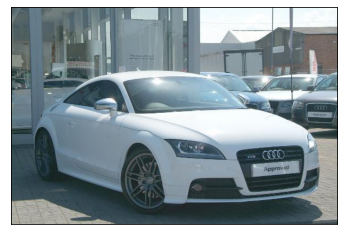

In [ ]:
img_path = cars_train_dir/'00001.jpg'
im = plt.imread(str(img_path))
ax = show_img(im)

In [ ]:
path_anno['annotations'][0, 0][4][0]

array([14], dtype=uint8)

In [ ]:
cars_meta["class_names"][0, 14]

array(['Audi R8 Coupe 2012'], dtype='<U18')

In [ ]:
def build_dataFrame():
    cars_anno = sio.loadmat(path_dir/'cars_train_annos.mat')
    cars_meta = sio.loadmat(path_dir/'cars_meta.mat')

    nclasses = len(cars_meta["class_names"][0])
    assert nclasses == 196

    class_names = dict(zip(range(1, nclasses+1), [c[0] for c in cars_meta['class_names'][0]]))

    dataset = []
    for i, arr in enumerate(cars_anno['annotations'][0]):
        dataset.append([y[0][0] for y in arr ][:-1] + [arr[-1][0]])
    temp_df = pd.DataFrame(dataset, columns = ['bbox_x1', 'bbox_y1','bbox_x2','bbox_y2', 'ClassID', 'filename'])
    temp_df = temp_df.assign(ClassName = temp_df.ClassID.map(dict(class_names)))
    return temp_df

In [ ]:
data_frame = build_dataFrame()
data_frame.head(4)

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,ClassID,filename,ClassName
0,39,116,569,375,14,00001.jpg,Audi TTS Coupe 2012
1,36,116,868,587,3,00002.jpg,Acura TL Sedan 2012
2,85,109,601,381,91,00003.jpg,Dodge Dakota Club Cab 2007
3,621,393,1484,1096,134,00004.jpg,Hyundai Sonata Hybrid Sedan 2012


In [ ]:
data_frame.to_csv(path_dir/"ConvertedDataFrame.csv")

In [ ]:
path_dir.ls()

[PosixPath('/content/stanford-cars-v2/devkit/cars_meta.mat'),
 PosixPath('/content/stanford-cars-v2/devkit/README.txt'),
 PosixPath('/content/stanford-cars-v2/devkit/cars_test_annos.mat'),
 PosixPath('/content/stanford-cars-v2/devkit/cars_train_annos.mat'),
 PosixPath('/content/stanford-cars-v2/devkit/eval_train.m'),
 PosixPath('/content/stanford-cars-v2/devkit/train_perfect_preds.txt')]

In [ ]:
SEED = 42
np.random.seed(SEED)

In [ ]:
img_size = 224

In [ ]:
ds_tfms=get_transforms(); ds_tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do

In [ ]:
data = ImageDataBunch.from_df(
    path = cars_train_dir,
    ds_tfms = ds_tfms,
    df = data_frame,
    bs = bs,
    seed = SEED,
    valid_pct = 0.2,
    size = img_size,
    fn_col = "filename",
    label_col="ClassName"
).normalize(imagenet_stats)

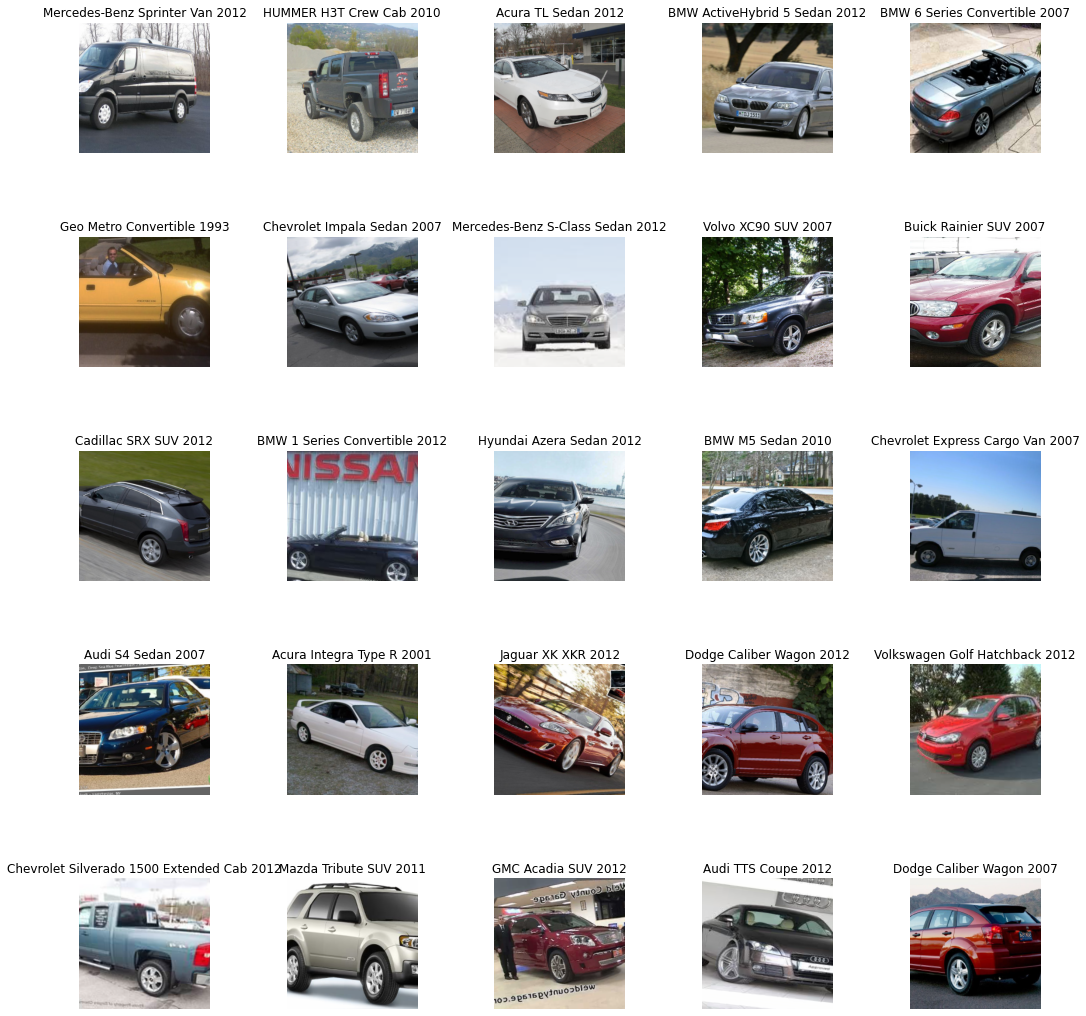

In [ ]:
data.show_batch(rows=5, figsize=(15,15))

In [ ]:
print(data.classes)
len(data.classes), data.c

['AM General Hummer SUV 2000', 'Acura Integra Type R 2001', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura ZDX Hatchback 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012', 'Audi RS 4 Convertible 2008', 'Audi S4 Sedan 2007', 'Audi S4 Sedan 2012', 'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012', 'Audi S6 Sedan 2011', 'Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012', 'Audi TTS Coupe 2012', 'Audi V8 Sedan 1994', 'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'BMW 6 Series Convertible 2007', 'BMW ActiveHybrid 5 Sedan 2012', 'BMW M3 Coupe 2012', 'BMW M5 Sedan 2010', 'BMW M6 Convertible 2010', 'BMW X3 SUV 2012', 'BMW X5 SUV 2007', 'BMW X6 SUV 2012', 'BMW Z4 Convertible 2012

(196, 196)

## Training: resnet34

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy, top_k_accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,5.892838,3.907906,0.850123,0.149877,0.378993,03:37
1,4.142341,2.873806,0.693489,0.306511,0.595823,03:36
2,3.093781,2.445346,0.595209,0.404791,0.694717,03:37
3,2.553053,2.367860,0.587224,0.412776,0.719287,03:36


In [ ]:
learn.save('stage1-resnet32')

## Results of Resnet32

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

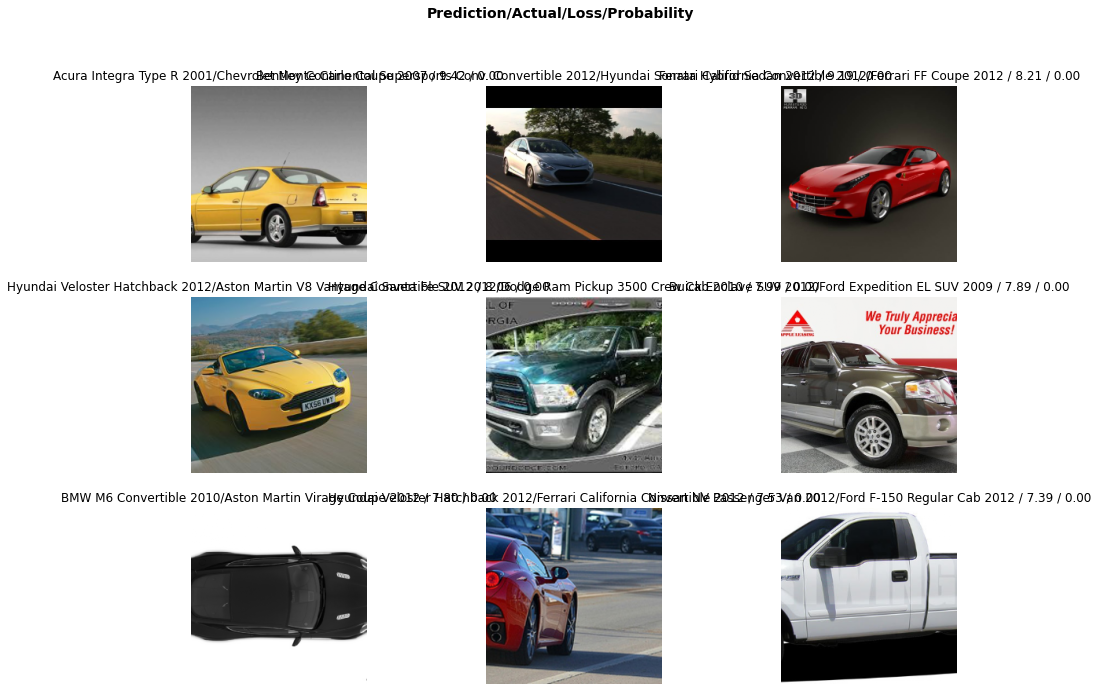

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
most_confused = interp.most_confused()
most_confused

[('Dodge Dakota Club Cab 2007',
  'Chevrolet Silverado 1500 Extended Cab 2012',
  6),
 ('Audi 100 Sedan 1994', 'Audi V8 Sedan 1994', 5),
 ('Chevrolet Express Van 2007', 'GMC Savana Van 2012', 5),
 ('Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 4),
 ('BMW 6 Series Convertible 2007', 'Chrysler Crossfire Convertible 2008', 4),
 ('Chevrolet Malibu Sedan 2007', 'Ford Focus Sedan 2007', 4),
 ('Chevrolet Silverado 1500 Extended Cab 2012',
  'Chevrolet Silverado 1500 Regular Cab 2012',
  4),
 ('Spyker C8 Convertible 2009', 'Spyker C8 Coupe 2009', 4),
 ('Aston Martin V8 Vantage Convertible 2012',
  'Aston Martin Virage Convertible 2012',
  3),
 ('Audi A5 Coupe 2012', 'Audi S6 Sedan 2011', 3),
 ('Audi S4 Sedan 2007', 'Audi S6 Sedan 2011', 3),
 ('Audi S4 Sedan 2012', 'Audi S6 Sedan 2011', 3),
 ('Dodge Dakota Crew Cab 2010', 'Ford Ranger SuperCab 2011', 3),
 ('Dodge Ram Pickup 3500 Quad Cab 2009',
  'Chevrolet Silverado 1500 Extended Cab 2012',
  3),
 ('GMC Savana Van 2012', 'Chevrolet Express Van

## Unfreezing, fine-tuning, and learning rates resnet32

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,2.767126,1.933596,0.509828,0.490172,0.795455,03:40


In [ ]:
learn.load('stage1-resnet32')

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


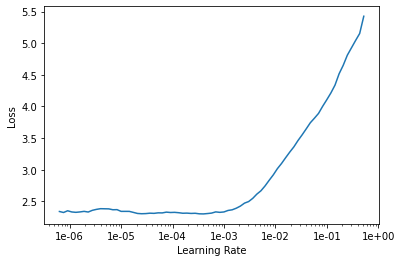

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,1.790191,1.732890,0.447174,0.552826,0.828624,03:43
1,1.542025,1.629481,0.430590,0.569410,0.848280,03:43


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5b62b30438>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 942, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5b62b30438>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/l

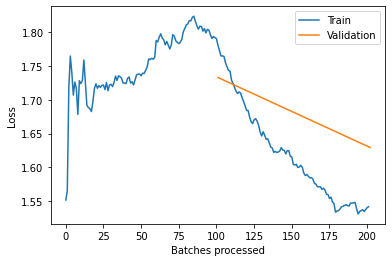

In [ ]:
learn.recorder.plot_losses()

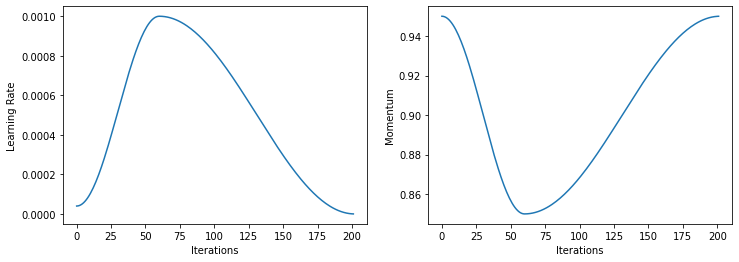

In [ ]:
learn.recorder.plot_lr(show_moms=True)

## Training Resnet50

In [ ]:
data = ImageDataBunch.from_df(
    path = cars_train_dir,
    ds_tfms = ds_tfms,
    df = data_frame,
    bs = bs//2,
    seed = SEED,
    valid_pct = 0.2,
    size = img_size,
    fn_col = "filename",
    label_col="ClassName"
).normalize(imagenet_stats)                                   

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


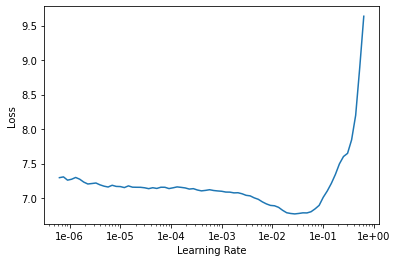

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,5.413575,3.852958,0.835381,0.164619,04:01
1,3.991615,3.012216,0.717445,0.282555,03:58
2,3.116149,2.336759,0.596437,0.403563,03:59
3,2.451988,1.945064,0.519042,0.480958,03:59
4,1.891651,1.638525,0.441032,0.558968,03:59
5,1.559263,1.511416,0.409705,0.590295,03:57
6,1.179364,1.407472,0.388206,0.611794,03:58
7,1.077245,1.391165,0.379607,0.620393,03:59


In [ ]:
learn.save('stage-1-resnet50-8-epoch')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(6, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.032740,1.361247,0.372236,0.627764,04:12
1,0.978815,1.281899,0.345823,0.654177,04:13
2,0.901292,1.220732,0.329853,0.670147,04:13
3,0.802838,1.172469,0.318182,0.681818,04:14
4,0.771495,1.159532,0.313268,0.686732,04:13
5,0.741139,1.153668,0.315725,0.684275,04:14


In [ ]:
learn.fit_one_cycle(6, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.739071,1.143398,0.305897,0.694103,04:13
1,0.700515,1.117405,0.311425,0.688575,04:13
2,0.680064,1.078333,0.304054,0.695946,04:13
3,0.644189,1.051709,0.288698,0.711302,04:13
4,0.620389,1.038890,0.291155,0.708845,04:12
5,0.547520,1.037167,0.289926,0.710074,04:12


In [ ]:
learn.load('stage-1-resnet50-8-epoch');

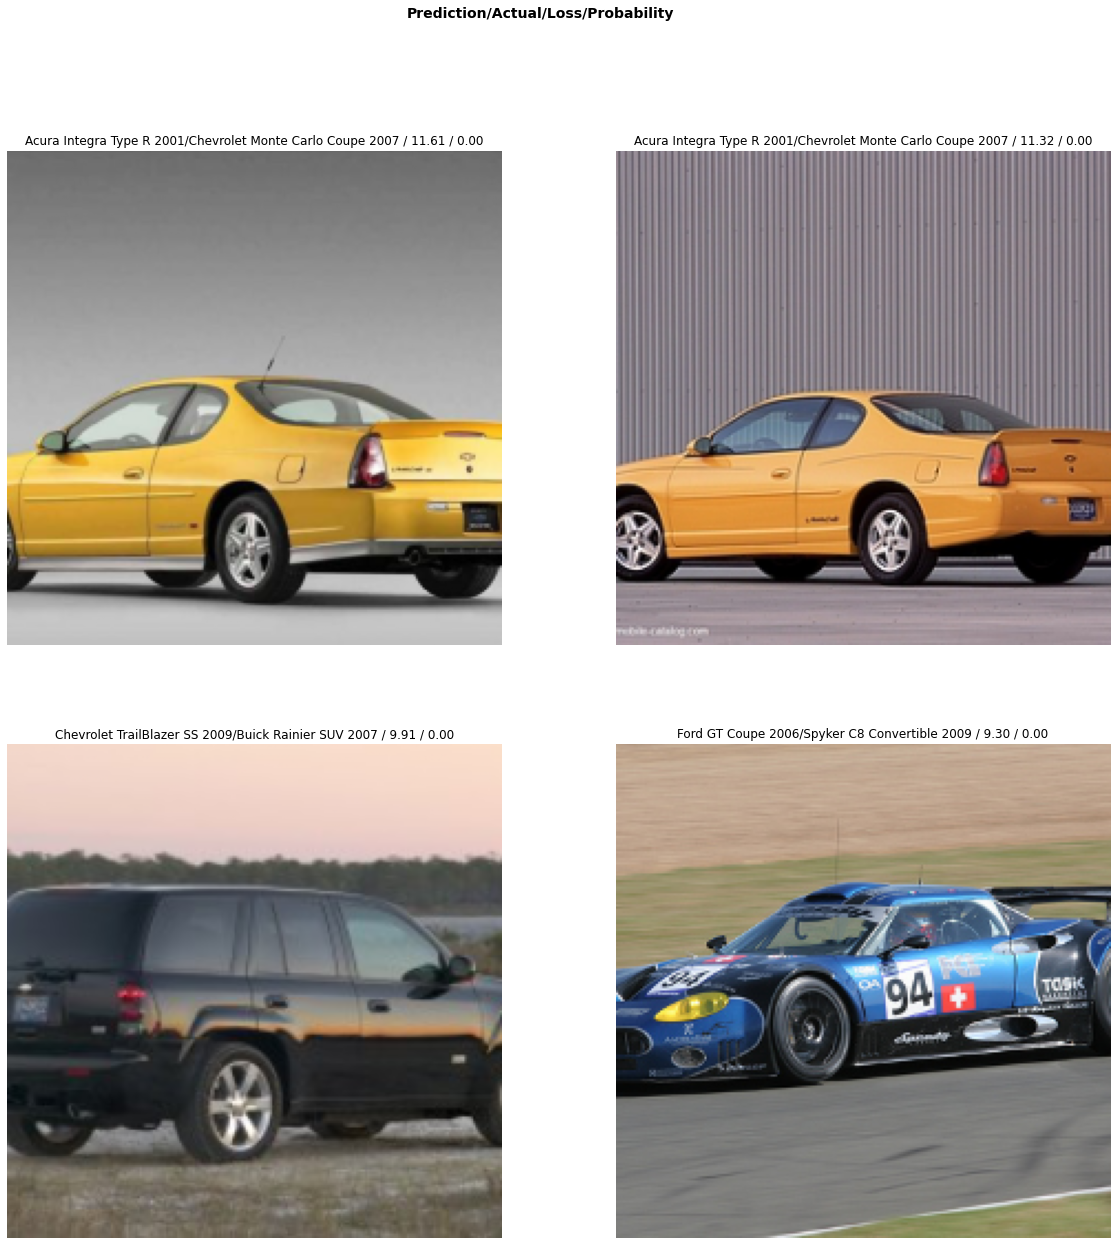

In [112]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(20,20))


In [113]:
most_confused = interp.most_confused(min_val=2)
most_confused

[('Dodge Dakota Club Cab 2007',
  'Chevrolet Silverado 1500 Extended Cab 2012',
  5),
 ('Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 4),
 ('Audi S4 Sedan 2007', 'Audi S6 Sedan 2011', 4),
 ('Acura Integra Type R 2001', 'Eagle Talon Hatchback 1998', 3),
 ('Audi 100 Wagon 1994', 'Audi 100 Sedan 1994', 3),
 ('Audi S6 Sedan 2011', 'Hyundai Genesis Sedan 2012', 3),
 ('Audi TT Hatchback 2011', 'Audi TTS Coupe 2012', 3),
 ('Bentley Continental GT Coupe 2007',
  'Bentley Continental Flying Spur Sedan 2007',
  3),
 ('Bentley Continental GT Coupe 2012', 'Bentley Continental GT Coupe 2007', 3),
 ('Bugatti Veyron 16.4 Coupe 2009', 'Bugatti Veyron 16.4 Convertible 2009', 3),
 ('Chevrolet Avalanche Crew Cab 2012',
  'Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  3),
 ('Chevrolet Express Van 2007', 'GMC Savana Van 2012', 3),
 ('Chevrolet Malibu Sedan 2007', 'Ford Focus Sedan 2007', 3),
 ('Chevrolet Silverado 1500 Extended Cab 2012',
  'Chevrolet Silverado 1500 Regular Cab 2012',
  3),
 ('Chevrole

In [ ]:
bbb

In [ ]:
b

In [ ]:
b

In [ ]:
bb

In [ ]:
b

In [ ]:
bb

In [ ]:
b

In [ ]:
bb

In [ ]:
b

In [ ]:
bb

In [ ]:
b